In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Time
import time
import datetime

# Machine Learning
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
# some changes to sklearm packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import minmax_scale

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# imbalanced learning (more on this later)
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import chi2_contingency,  f_oneway

import gc
import warnings
from tqdm import tqdm
import pickle

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
!unzip /content/intermediate.pkl.zip

Archive:  /content/intermediate.pkl.zip
replace intermediate.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
path = "/content/intermediate.pkl"

In [ ]:
with open(path, 'rb') as f:
    df = pickle.load(f)

In [ ]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,...,V140_missing_flag,V141_missing_flag,V142_missing_flag,V143_missing_flag,V144_missing_flag,V145_missing_flag,V146_missing_flag,V147_missing_flag,V148_missing_flag,V149_missing_flag,V150_missing_flag,V151_missing_flag,V152_missing_flag,V153_missing_flag,V154_missing_flag,V155_missing_flag,V156_missing_flag,V157_missing_flag,V158_missing_flag,V159_missing_flag,V160_missing_flag,V161_missing_flag,V162_missing_flag,V163_missing_flag,V164_missing_flag,V165_missing_flag,V166_missing_flag,V167_missing_flag,V168_missing_flag,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V205_missing_flag,V206_missing_flag,V207_missing_flag,V208_missing_flag,V209_missing_flag,V210_missing_flag,V211_missing_flag,V212_missing_flag,V213_missing_flag,V214_missing_flag,V215_missing_flag,V216_missing_flag,V217_missing_flag,V218_missing_flag,V219_missing_flag,V220_missing_flag,V221_missing_flag,V222_missing_flag,V223_missing_flag,V224_missing_flag,V225_missing_flag,V226_missing_flag,V227_missing_flag,V228_missing_flag,V229_missing_flag,V230_missing_flag,V231_missing_flag,V232_missing_flag,V233_missing_flag,V234_missing_flag,V235_missing_flag,V236_missing_flag,V237_missing_flag,V238_missing_flag,V239_missing_flag,V240_missing_flag,V241_missing_flag,V242_missing_flag,V243_missing_flag,V244_missing_flag,V245_missing_flag,V246_missing_flag,V247_missing_flag,V248_missing_flag,V249_missing_flag,V250_missing_flag,V251_missing_flag,V252_missing_flag,V253_missing_flag,V254_missing_flag,V255_missing_flag,V256_missing_flag,V257_missing_flag,V258_missing_flag,V259_missing_flag,V260_missing_flag,V261_missing_flag,V262_missing_flag,V263_missing_flag,V264_missing_flag,V265_missing_flag,V266_missing_flag,V267_missing_flag,V268_missing_flag,V269_missing_flag,V270_missing_flag,V271_missing_flag,V272_missing_flag,V273_missing_flag,V274_missing_flag,V275_missing_flag,V276_missing_flag,V277_missing_flag,V278_missing_flag,V279_missing_flag,V280_missing_flag,V281_missing_flag,V282_missing_flag,V283_missing_flag,V284_missing_flag,V285_missing_flag,V286_missing_flag,V287_missing_flag,V288_missing_flag,V289_missing_flag,V290_missing_flag,V291_missing_flag,V292_missing_flag,V293_missing_flag,V294_missing_flag,V295_missing_flag,V296_missing_flag,V297_missing_flag,V298_miss

<AxesSubplot:xlabel='ProductCD', ylabel='Count'>

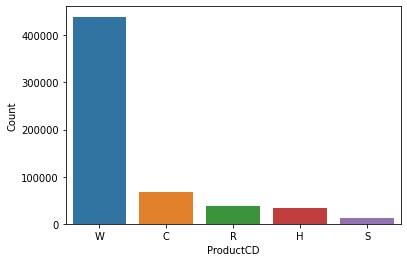

In [ ]:
distrib = pd.DataFrame(df.ProductCD.value_counts().reset_index())
distrib.columns = ['ProductCD',"Count"]
sns.barplot(data=distrib, x="ProductCD", y="Count")

In [ ]:
def plot_cat_feat_dist(df, col):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

    plt.figure(figsize=(25, 18))
    plt.suptitle(f'{col} Distributions', fontsize=22)

    plt.subplot(221)
    g = sns.countplot(x=col, data=df, order=tmp[col].values)

    g.set_title(f"{col} Distribution", fontsize=16)
    g.set_xlabel(f"{col} Name", fontsize=17)
    g.set_ylabel("Count", fontsize=17)

    plt.subplot(222)
    g1 = sns.countplot(x=col, hue='isFraud', data=df, order=tmp[col].values)
    plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

    g1.set_title(f"{col} Distribution by Target Variable (isFraud) ", fontsize=16)
    g1.set_xlabel(f"{col} Name", fontsize=17)
    g1.set_ylabel("Count", fontsize=17)

    plt.subplots_adjust(hspace = 0.4, top = 0.85)

    plt.show()

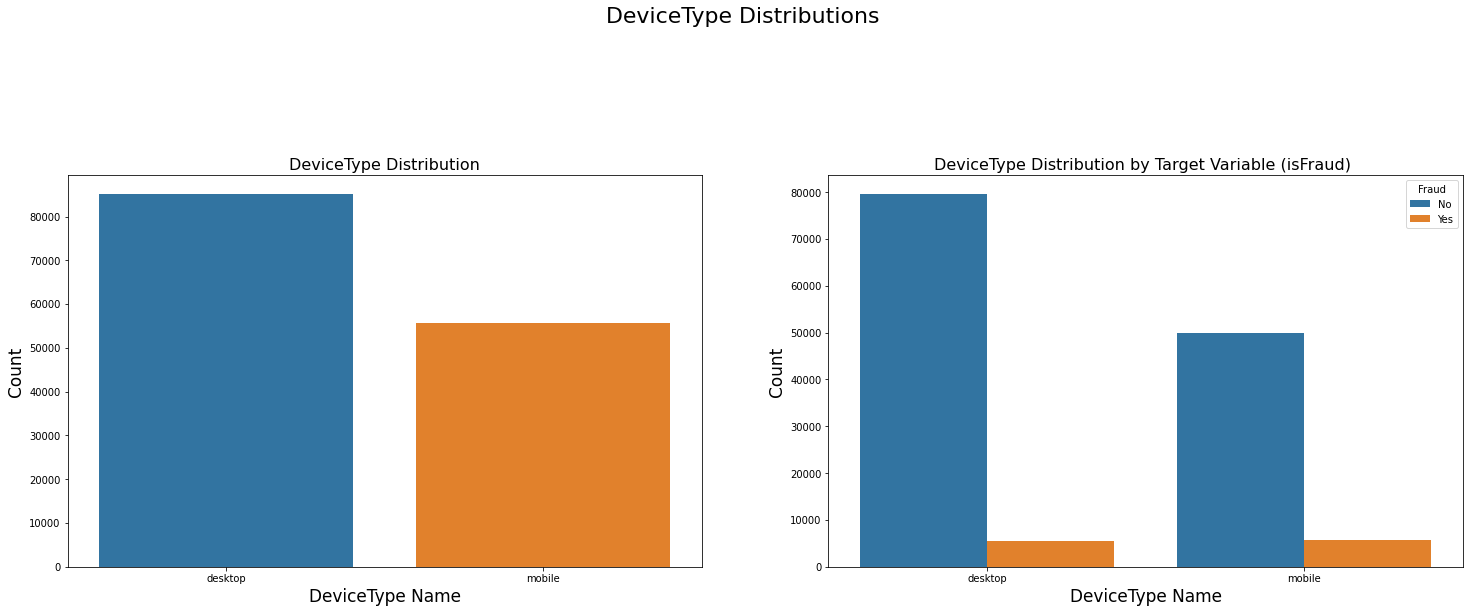

In [ ]:
plot_cat_feat_dist(df, "DeviceType")

<AxesSubplot:xlabel='isFraud'>

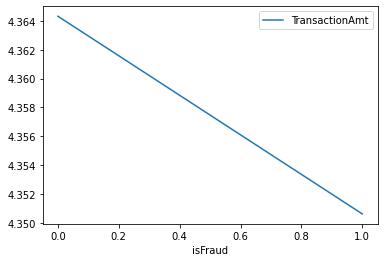

In [ ]:
df.groupby('isFraud')['TransactionAmt'].mean().plot(legend=True)

In [ ]:
cat_columns = df.select_dtypes(include=['object']).columns
frequency_encoded_variables = []
for col in cat_columns:
    if df[col].nunique() > 30:
      frequency_encoded_variables.append(col)
    else:
      print(col)
      df=df.drop(col,axis=1)
cat_columns = cat_columns.to_list()
for variable in tqdm(frequency_encoded_variables):
    fq = df.groupby(variable).size()/len(df)
    df.loc[:, "{}".format(variable)] = df[variable].map(fq)
    cat_columns.remove(variable)
    print(fq)
float16_cols = list(df.select_dtypes(include=['float16']).columns)
new_type = dict((col,'float') for col in float16_cols)
df = df.astype(new_type)

ProductCD
card4
card6
P_emaildomain
R_emaildomain
M1
M2
M3
M4
M5
M6
M7
M8
M9
id_12
id_15
id_16
id_28
id_29
id_30
id_34
id_35
id_36
id_37
id_38
DeviceType


100%|██████████| 3/3 [00:00<00:00, 12.99it/s]

id_31
BLU/Dash                          0.000002
Cherry                            0.000002
Generic/Android                   0.000097
Generic/Android 7.0               0.000137
Inco/Minion                       0.000002
LG/K-200                          0.000002
Lanix/Ilium                       0.000005
M4Tel/M4                          0.000002
Microsoft/Windows                 0.000042
Mozilla/Firefox                   0.000008
Nokia/Lumia                       0.000002
Samsung/SCH                       0.000002
Samsung/SM-G531H                  0.000088
Samsung/SM-G532M                  0.000254
ZTE/Blade                         0.000015
android                           0.000002
android browser 4.0               0.000169
android webview 4.0               0.000483
aol                               0.000008
chrome                            0.000725
chrome 43.0 for android           0.000122
chrome 46.0 for android           0.000117
chrome 49.0                       0.001218
chrom

In [ ]:
print(fq)

DeviceInfo
0PAJ5             0.000002
0PJA2             0.000002
0PM92             0.000007
1016S             0.000002
2PQ93             0.000002
                    ...   
verykools5004     0.000003
verykools5034     0.000002
verykools5035     0.000002
vivo              0.000008
xs-Z47b7VqTMxs    0.000002
Length: 1786, dtype: float64


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
for col in df:
  df[col]=df[col].fillna((df[col].mean()))

In [ ]:
x = df.drop(['isFraud','Date','TransactionID'],axis=1)
y = df.isFraud.astype(bool)

In [ ]:
x.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,...,V139_missing_flag,V140_missing_flag,V141_missing_flag,V142_missing_flag,V143_missing_flag,V144_missing_flag,V145_missing_flag,V146_missing_flag,V147_missing_flag,V148_missing_flag,V149_missing_flag,V150_missing_flag,V151_missing_flag,V152_missing_flag,V153_missing_flag,V154_missing_flag,V155_missing_flag,V156_missing_flag,V157_missing_flag,V158_missing_flag,V159_missing_flag,V160_missing_flag,V161_missing_flag,V162_missing_flag,V163_missing_flag,V164_missing_flag,V165_missing_flag,V166_missing_flag,V167_missing_flag,V168_missing_flag,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V205_missing_flag,V206_missing_flag,V207_missing_flag,V208_missing_flag,V209_missing_flag,V210_missing_flag,V211_missing_flag,V212_missing_flag,V213_missing_flag,V214_missing_flag,V215_missing_flag,V216_missing_flag,V217_missing_flag,V218_missing_flag,V219_missing_flag,V220_missing_flag,V221_missing_flag,V222_missing_flag,V223_missing_flag,V224_missing_flag,V225_missing_flag,V226_missing_flag,V227_missing_flag,V228_missing_flag,V229_missing_flag,V230_missing_flag,V231_missing_flag,V232_missing_flag,V233_missing_flag,V234_missing_flag,V235_missing_flag,V236_missing_flag,V237_missing_flag,V238_missing_flag,V239_missing_flag,V240_missing_flag,V241_missing_flag,V242_missing_flag,V243_missing_flag,V244_missing_flag,V245_missing_flag,V246_missing_flag,V247_missing_flag,V248_missing_flag,V249_missing_flag,V250_missing_flag,V251_missing_flag,V252_missing_flag,V253_missing_flag,V254_missing_flag,V255_missing_flag,V256_missing_flag,V257_missing_flag,V258_missing_flag,V259_missing_flag,V260_missing_flag,V261_missing_flag,V262_missing_flag,V263_missing_flag,V264_missing_flag,V265_missing_flag,V266_missing_flag,V267_missing_flag,V268_missing_flag,V269_missing_flag,V270_missing_flag,V271_missing_flag,V272_missing_flag,V273_missing_flag,V274_missing_flag,V275_missing_flag,V276_missing_flag,V277_missing_flag,V278_missing_flag,V279_missing_flag,V280_missing_flag,V281_missing_flag,V282_missing_flag,V283_missing_flag,V284_missing_flag,V285_missing_flag,V286_missing_flag,V287_missing_flag,V288_missing_flag,V289_missing_flag,V290_missing_flag,V291_missing_flag,V292_missing_flag,V293_missing_flag,V294_missing_flag,V295_missing_flag,V296_missing_flag,V297_missing_flag,V298_missi

In [ ]:
x.isna().sum()

TransactionDT                   0
TransactionAmt                  0
card1                           0
card2                           0
card3                           0
                               ..
Trans_min_std                   0
TransactionAmt_to_mean_card1    0
TransactionAmt_to_mean_card4    0
TransactionAmt_to_std_card1     0
TransactionAmt_to_std_card4     0
Length: 817, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_prob_pred = clf.predict_proba(x_test)
y_prob_pred = [x[1] for x in y_prob_pred]
print("Y predicted : ", y_pred)
print("Y probability predicted : ", y_prob_pred[:5])

Y predicted :  [False False False ... False False False]
Y probability predicted :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : ",accuracy_score(y_actual, y_predicted))
    print("\n AUC Score : ", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))
'''
    print("\n ROC curve : \n")
    # change name
    roc_curve(y_actual, y_predicted)
    plt.show()

    print("\n PR curve : \n")
    # change name
    precision_recall_curve(y_actual, y_predicted)
    plt.show() '''

'\n    print("\n ROC curve : \n")\n    # change name \n    roc_curve(y_actual, y_predicted)\n    plt.show() \n\n    print("\n PR curve : \n")\n    # change name \n    precision_recall_curve(y_actual, y_predicted)\n    plt.show() '

In [ ]:
compute_evaluation_metric(clf, x_test, y_test, y_pred, y_prob_pred)


 Accuracy Score :  0.9670019530147549

 AUC Score :  0.7806478567535418

 Confusion Matrix : 
 [[167763   3278]
 [  2568   3553]]

 Classification Report : 
               precision    recall  f1-score   support

       False       0.98      0.98      0.98    171041
        True       0.52      0.58      0.55      6121

    accuracy                           0.97    177162
   macro avg       0.75      0.78      0.77    177162
weighted avg       0.97      0.97      0.97    177162




 ROC curve : 



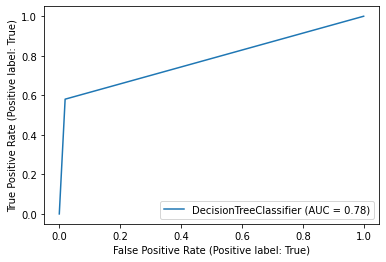

In [ ]:
print("\n ROC curve : \n")
RocCurveDisplay.from_estimator(clf, x_test, y_test)


 PR curve : 



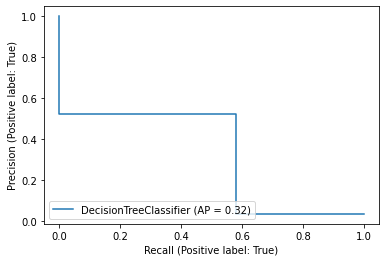

In [ ]:
print("\n PR curve : \n")
PrecisionRecallDisplay.from_estimator(clf, x_test, y_test)